# Simple training (no hyperparameter tuning)
Tips and tricks: https://inclass.kaggle.com/c/deloitte-tackles-titanic/forums/t/9841/getting-high-scores-without-looking-at-actual-data-set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble, svm
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn import metrics

#Plots config
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [21]:
#Add plots module to path
import sys
sys.path.append('/Users/Edu/Development/open-source/sklearn-model-evaluation')
import plots as p
import helpers as h

## Data loading

In [3]:
#Read the data
train = pd.read_csv("train_clean.csv", index_col='PassengerId')
test = pd.read_csv('test_clean.csv', index_col='PassengerId')

## Model training

In [4]:
#RandomForest
rf = ensemble.RandomForestClassifier(n_jobs = -1,
                                     bootstrap = True,
                                     criterion = 'entropy',
                                     max_features = 'log2',
                                     n_estimators = 100)
#AdaBoost
ab = ensemble.AdaBoostClassifier(n_estimators = 10)
#SVC
svc = svm.SVC(C = 100,
              gamma = 0.01,
              kernel = 'rbf')

In [5]:
#Prepare train and test features
train_x = train.drop(['Survived'], axis=1).values
test_x = test.values
#Prepare train and test scaled features (for SVC)
scaler = preprocessing.StandardScaler().fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled  = scaler.transform(test_x)
#Prepare train outcome
train_y = train['Survived']

#Create feature list
feature_list = list(train.drop(['Survived'], axis=1))

In [6]:
#Train random forest
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
#Train svc
svc.fit(train_x_scaled, train_y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.01,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
#Train adaboost
ab.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=10, random_state=None)

## Predict on training set (using cross-validation)

In [9]:
#Since we are using all data for training, generate predictions
#for evaluation using cross-validation
rf_pred  = cross_validation.cross_val_predict(rf,
                                              train_x,
                                              train_y,
                                              cv=5)

In [10]:
svc_pred = cross_validation.cross_val_predict(svc,
                                              train_x_scaled,
                                              train_y,
                                              cv=5)

In [11]:
ab_pred  = cross_validation.cross_val_predict(ab,
                                              train_x,
                                              train_y,
                                              cv=5)

## Model evaluation

In [12]:
print("RandomForest")
print(metrics.classification_report(train_y, rf_pred))
print("\n\n\n")

print("SVC")
print(metrics.classification_report(train_y, svc_pred))
print("\n\n\n")

print("AdaBoost")
print(metrics.classification_report(train_y, ab_pred))

RandomForest
             precision    recall  f1-score   support

        0.0       0.83      0.86      0.84       549
        1.0       0.76      0.72      0.74       342

avg / total       0.80      0.80      0.80       891





SVC
             precision    recall  f1-score   support

        0.0       0.83      0.89      0.86       549
        1.0       0.80      0.71      0.75       342

avg / total       0.82      0.82      0.82       891





AdaBoost
             precision    recall  f1-score   support

        0.0       0.85      0.86      0.86       549
        1.0       0.77      0.75      0.76       342

avg / total       0.82      0.82      0.82       891



In [13]:
#Compute accuracy (that's the evaluation metric 
#for this competition)
print("RandomForest accuracy:")
print(metrics.accuracy_score(train_y, rf_pred))
print("\nSVC accuracy:")
print(metrics.accuracy_score(train_y, svc_pred))
print("\nAdaBoost accuracy:")
print(metrics.accuracy_score(train_y, ab_pred))

RandomForest accuracy:
0.803591470258

SVC accuracy:
0.820426487093

AdaBoost accuracy:
0.821548821549


## Feature importance

In [22]:
imp = h.feature_importances_table(rf, feature_list)
# Print the feature ranking
print("Feature ranking:")    
for i,t in enumerate(imp[0:5]):
    print("%d. feature %d - %s (%f)" % (i+1, t['num'], t['name'], t['importance']))

Feature ranking:
1. feature 0 - Fare (0.228245)
2. feature 4 - EstimatedAge (0.224866)
3. feature 23 - Mr (0.072779)
4. feature 7 - male (0.067724)
5. feature 6 - female (0.067012)


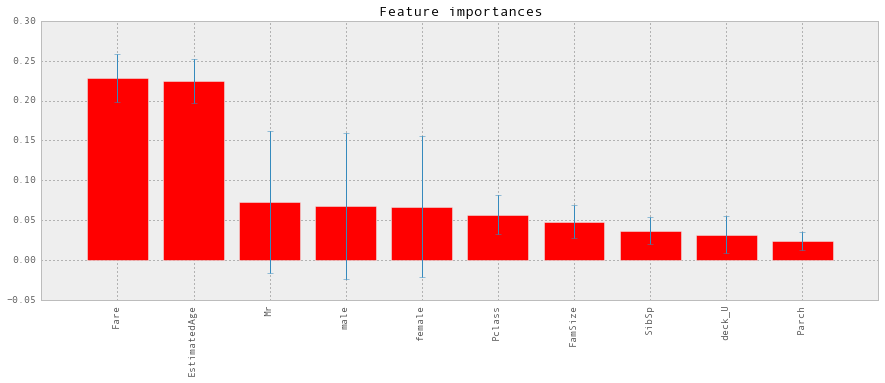

In [20]:
p.feature_importance_plot(rf, feature_list)

## Identifying wrong predictions